In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Importando DataSet

In [2]:
dataset = pd.read_csv('Employee_Compensation_SF.csv', sep=',')
# dataset = dataset.sample(100000)

# Exploring Data

# Gráfico da distribuição do Salários e Benefícios na Cidade

/home/ronyell/Documents/ML/virtual/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


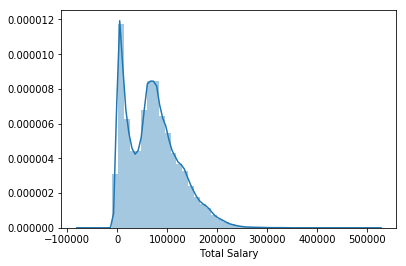

In [3]:
sns.distplot(dataset['Total Salary'])

/home/ronyell/Documents/ML/virtual/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


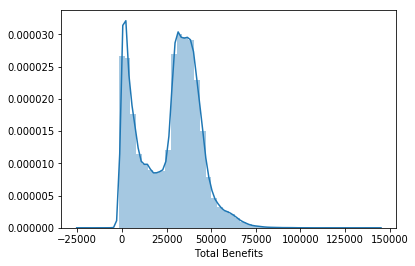

In [4]:
sns.distplot(dataset['Total Benefits'])

/home/ronyell/Documents/ML/virtual/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


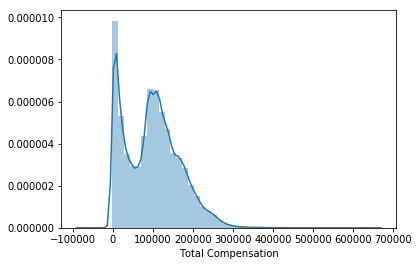

In [5]:
sns.distplot(dataset['Total Compensation'])

/home/ronyell/Documents/ML/virtual/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


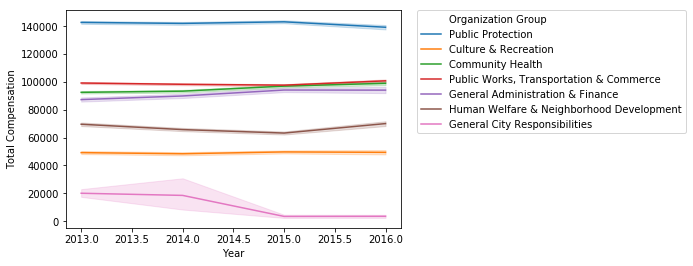

In [8]:
_ = sns.lineplot(x='Year',y='Total Compensation',hue='Organization Group',data=dataset)
_.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/home/ronyell/Documents/ML/virtual/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


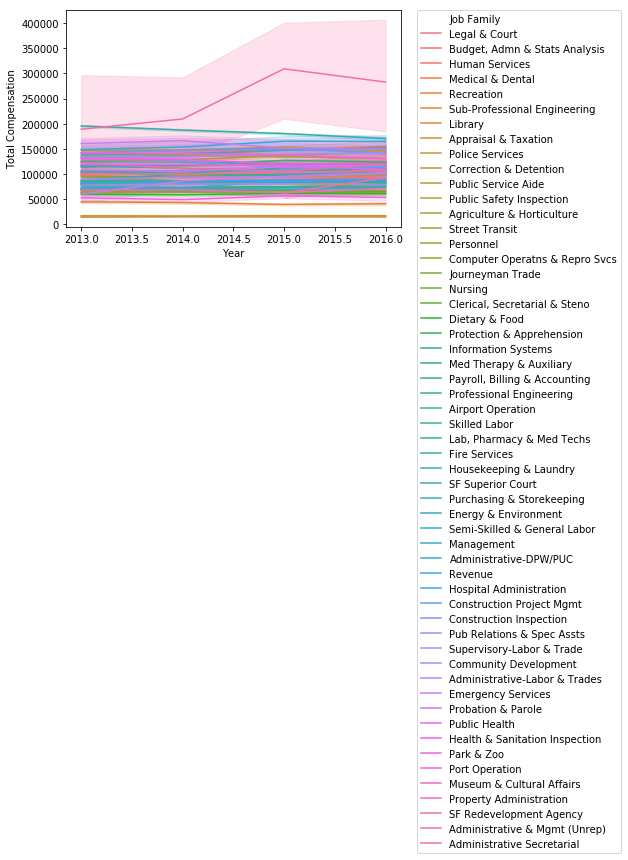

In [9]:
_ = sns.lineplot(x='Year',y='Total Compensation',hue='Job Family',data=dataset)
_.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

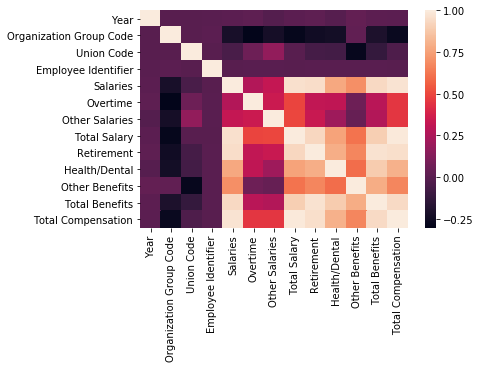

In [10]:
sns.heatmap(dataset.corr())

In [11]:
year_compensation = dataset.groupby(['Year']).mean().reset_index()[['Year','Total Compensation']]
year_compensation

,Year,Total Compensation
0,2013,97872.718129
1,2014,97087.853954
2,2015,97807.731425
3,2016,99658.289452


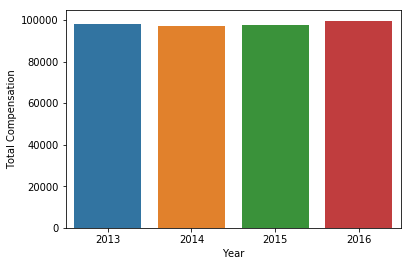

In [12]:
sns.barplot(x='Year', y='Total Compensation', data=year_compensation)

In [13]:
salary_year_organization = dataset.groupby(['Year','Organization Group']).mean().reset_index()[['Year','Organization Group','Total Compensation']]

# Settando Legenda para fora do Plot


Para nunca mais perder: 

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot/34579525


https://matplotlib.org/users/legend_guide.html

# Total Compensation ao longo do Tempo

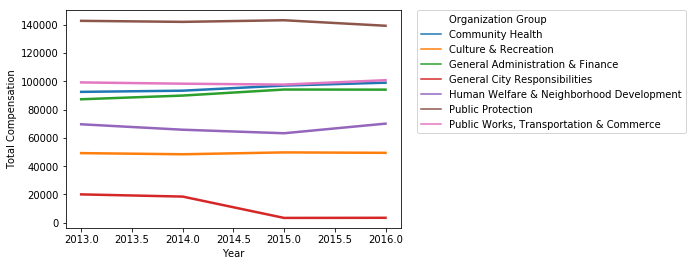

In [14]:
g = sns.lineplot(
    data=salary_year_organization,
    x='Year',
    y='Total Compensation',
    hue='Organization Group', 
    markers=True,
    linewidth=2.5)

g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Total Benefits ao longo do tempo

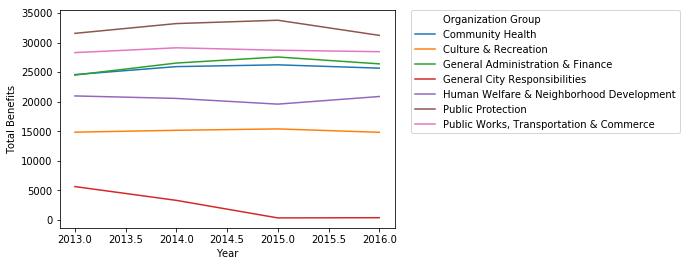

In [15]:
benefits_salary = dataset.groupby(['Year','Organization Group']).mean().reset_index()[['Year','Organization Group','Total Salary','Total Benefits']]

g = sns.lineplot(x='Year',y='Total Benefits', hue='Organization Group', data=benefits_salary)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/home/ronyell/Documents/ML/virtual/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


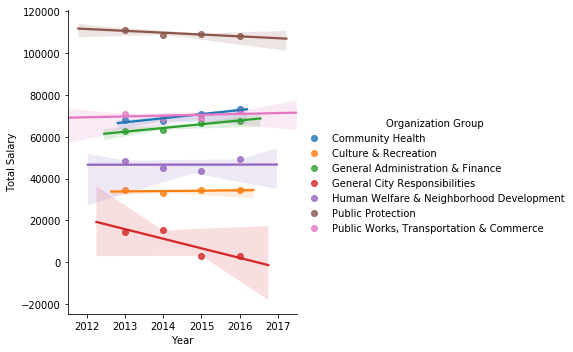

In [16]:
sns.lmplot(
    x='Year',
    y='Total Salary',
    hue='Organization Group',
    data=benefits_salary)

In [17]:
benefits_salary.groupby(['Organization Group']).corr()

Total Benefits  \
Organization Group                                                        
Community Health                         Total Benefits        1.000000   
                                         Total Salary          0.332780   
                                         Year                  0.641803   
Culture & Recreation                     Total Benefits        1.000000   
                                         Total Salary         -0.370298   
                                         Year                  0.075820   
General Administration & Finance         Total Benefits        1.000000   
                                         Total Salary          0.642453   
                                         Year                  0.679665   
General City Responsibilities            Total Benefits        1.000000   
                                         Total Salary          0.909604   
                                         Year                 -0.946114   
Human Welfare & Neighborhood Development Total Benefits        1.000000   
                                         Total Salary          0.895220   
                                         Year                 -0.257545   
Public Protection                        Total Benefits        1.000000   
                                         Total Salary         -0.081692   
                                         Year                 -0.048289   
Public Works, Transportation & Commerce  Total Benefits        1.000000   
                                         Total Salary         -0.715876   
                                         Year                  0.018757   

                                                         Total Salary  \
Organization Group                                                      
Community Health                         Total Benefits      0.332780   
                                         Total Salary        1.000000   
                                         Year                0.920139   
Culture & Recreation                     Total Benefits     -0.370298   
                                         Total Salary        1.000000   
                                         Year                0.381051   
General Administration & Finance         Total Benefits      0.642453   
                                         Total Salary        1.000000   
                                         Year                0.964006   
General City Responsibilities            Total Benefits      0.909604   
                                         Total Salary        1.000000   
                                         Year               -0.877441   
Human Welfare & Neighborhood Development Total Benefits      0.895220   
                                         Total Salary        1.000000   
                                         Year                0.007715   
Public Protection                        Total Benefits     -0.081692   
                                         Total Salary        1.000000   
                                         Year               -0.851807   
Public Works, Transportation & Commerce  Total Benefits     -0.715876   
                                         Total Salary        1.000000   
                                         Year                0.328410   

                                                             Year  
Organization Group                                                 
Community Health                         Total Benefits  0.641803  
                                         Total Salary    0.920139  
                                         Year            1.000000  
Culture & Recreation                     Total Benefits  0.075820  
                                         Total Salary    0.381051  
                                         Year            1.000000  
General Administration & Finance         Total Benefits  0.679665  
                                       

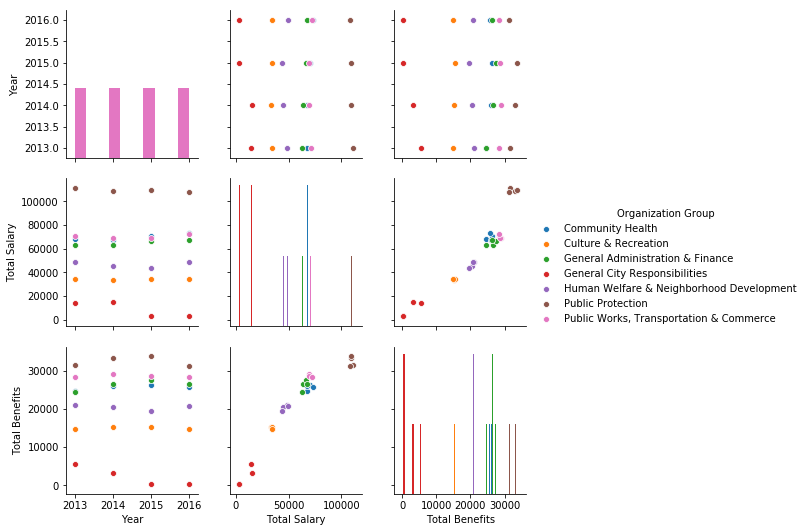

In [18]:
sns.pairplot(benefits_salary, hue='Organization Group', diag_kind='hist')

In [80]:
to_be_removed = ['Year Type','Organization Group Code','Department Code','Union Code','Job Family Code','Job Code','Job','Employee Identifier', 'Retirement','Health/Dental', 'Other Benefits', 'Salaries', 'Overtime','Other Salaries', 'Total Salary','Total Benefits']
ds = dataset.drop(to_be_removed,axis=1)
ds.head()

,Year,Organization Group,Department,Union,Job Family,Total Compensation
0,2016,Public Protection,District Attorney,Municipal Attorneys' Association,Legal & Court,159436.65
1,2013,Culture & Recreation,Arts Commission,"SEIU - Miscellaneous, Local 1021","Budget, Admn & Stats Analysis",120054.05
2,2015,Community Health,Public Health,"SEIU - Human Services, Local 1021",Human Services,13868.64
3,2015,Community Health,Public Health,"SEIU - Health Workers, Local 1021",Medical & Dental,3718.50
4,2014,Culture & Recreation,Recreation and Park Commission,"SEIU - Miscellaneous, Local 1021",Recreation,10128.64


In [81]:
print(
    len(dataset['Job Family'].unique()),
    len(dataset['Department'].unique())
)

56 54


## Dropando as observações que possuem algum dado faltando

In [82]:
ds[ds.isnull().any(axis=1)].shape

(45, 6)

In [83]:
ds.drop(ds[ds.isnull().any(axis=1)].index, inplace=True)

In [84]:
ds.head()

,Year,Organization Group,Department,Union,Job Family,Total Compensation
0,2016,Public Protection,District Attorney,Municipal Attorneys' Association,Legal & Court,159436.65
1,2013,Culture & Recreation,Arts Commission,"SEIU - Miscellaneous, Local 1021","Budget, Admn & Stats Analysis",120054.05
2,2015,Community Health,Public Health,"SEIU - Human Services, Local 1021",Human Services,13868.64
3,2015,Community Health,Public Health,"SEIU - Health Workers, Local 1021",Medical & Dental,3718.50
4,2014,Culture & Recreation,Recreation and Park Commission,"SEIU - Miscellaneous, Local 1021",Recreation,10128.64


In [86]:
extract_columns = ['Job Family','Organization Group', 'Department', 'Union']
_ds = pd.get_dummies(ds, columns=extract_columns, prefix=extract_columns)
_ds.head()

,Year,Total Compensation,Job Family_Administrative & Mgmt (Unrep),Job Family_Administrative Secretarial,Job Family_Administrative-DPW/PUC,Job Family_Administrative-Labor & Trades,Job Family_Agriculture & Horticulture,Job Family_Airport Operation,Job Family_Appraisal & Taxation,"Job Family_Budget, Admn & Stats Analysis",...,"Union_Stationary Engineers, Local 39","Union_Teamsters - Miscellaneous, Local 856","Union_Teamsters - Supervising Nurses, Local 856","Union_Teamsters, Local 853","Union_Theatrical and Stage Employees, Local 16","Union_Transport Workers - Auto Svc Workers, Local 250-A","Union_Transport Workers - Fare Inspectors, Local 250-A","Union_Transport Workers - Miscellaneous, Local 250-A","Union_Transport Workers - Transit Operators, Local 250-A","Union_Transportation Workers, Local 200"
0,2016,159436.65,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013,120054.05,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2015,13868.64,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,3718.50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,10128.64,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
_ds.shape

(291780, 190)

# Elastic Net

In [88]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [89]:
X = _ds.drop('Total Compensation',axis=1)
y = _ds['Total Compensation']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [91]:
# Create the hyperparameter grid
l1_space = np.linspace(0.5, 1, 5)
param_grid = {'l1_ratio': l1_space}

In [99]:
# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet(l1_ratio=1)

In [49]:
# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=2)

In [100]:
# Fit it to the training data
elastic_net.fit(X_train, y_train)

/home/ronyell/Documents/ML/virtual/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [101]:
y_pred = elastic_net.predict(X_test)

In [102]:
r2 = elastic_net.score(X_test, y_test)

In [103]:
r2

0.4181218786781375

In [104]:
mse = mean_squared_error(y_test, y_pred)

In [105]:
mse

2669209709.032262